In [51]:
import pandas as pd

In [52]:
# create a data frame for the Hou gene list
#hou = pd.read_csv("..\data\Hou_gene_list.csv")

# read in full marker file as Hou
hou = pd.read_csv("..\data\Hou_gene_list_full.csv")

# drop the empty columns
hou = hou.drop(columns=['Unnamed: 7', 'Unnamed: 8'])
hou.head(10)

,cluster,gene,p_val,avg_logFC,pct.1,pct.2,p_val_adj
0,Superficial Epithelial,si:ch211-207n23.2,0.0,3.783526,0.983,0.256,0.0
1,Superficial Epithelial,zgc:111983,0.0,3.634558,0.987,0.295,0.0
2,Superficial Epithelial,CABZ01088053.1,0.0,3.398964,0.935,0.188,0.0
3,Superficial Epithelial,krt1-19d,0.0,3.254499,0.877,0.123,0.0
4,Superficial Epithelial,si:dkey-247k7.2,0.0,3.182882,0.961,0.117,0.0
5,Superficial Epithelial,cldne,0.0,3.068289,0.982,0.149,0.0
6,Superficial Epithelial,gig2l,0.0,3.018676,0.514,0.165,0.0
7,Superficial Epithelial,si:ch211-157c3.4,0.0,2.870359,0.983,0.268,0.0
8,Superficial Epithelial,CABZ01072255.2,0.0,2.858588,0.876,0.105,0.0
9,Superficial Epithelial,si:ch211-217k17.10,0.0,2.838415,0.886,0.096,0.0


In [127]:
hartig_file = "..\data\Hartig_0dpa_vs_2dpa_treated.csv"
file = '0dpa_vs_2dpa_treated'
tablename = 'summary_' + file + '.png'
plotname = 'plot_' + file + '.png'

In [128]:
#create a data frame for the Hartig gene list
hartig = pd.read_csv(hartig_file)
hartig.head(10)

,GeneID,logFC,logCPM,LR,PValue,FDR,DiffExp,Symbol,Description,GeneType,...,CTRL_2dpa_3_TPM,TREAT_2dpa_1_TPM,TREAT_2dpa_2_TPM,TREAT_2dpa_3_TPM,CTRL_4dpa_1_TPM,CTRL_4dpa_2_TPM,CTRL_4dpa_3_TPM,TREAT_4dpa_1_TPM,TREAT_4dpa_2_TPM,TREAT_4dpa_3_TPM
0,ENSDARG00000096664,6.750942,8.415291,12.790960,0.000348,0.027011,upregulated,cxl34c,CX chemokine ligand 34c [Source:ZFIN;Acc:ZDB-G...,protein_coding,...,9.770111,10.096804,10.068577,9.388004,7.350394,8.555127,8.252641,6.527213,5.852775,6.943827
1,ENSDARG00000045548,6.179994,5.746958,12.624282,0.000381,0.027011,upregulated,lepb,leptin b [Source:ZFIN;Acc:ZDB-GENE-041210-183],protein_coding,...,7.455249,7.657034,7.524105,6.880204,4.183884,5.430261,4.163816,4.532095,4.283667,5.433722
2,ENSDARG00000001452,5.917229,6.061651,13.789897,0.000204,0.023705,upregulated,adam8a,ADAM metallopeptidase domain 8a [Source:ZFIN;A...,protein_coding,...,6.713800,8.243027,8.242038,7.751025,5.157801,6.147729,5.112020,4.254273,4.430261,4.629480
3,ENSDARG00000021948,5.621858,6.661723,13.077832,0.000299,0.026051,upregulated,tnc,tenascin C [Source:ZFIN;Acc:ZDB-GENE-980526-104],protein_coding,...,7.906436,7.393338,7.768130,6.921246,6.468530,6.819720,6.664502,6.816643,6.627680,7.049166
4,ENSDARG00000036082,5.474147,4.870825,9.797602,0.001747,0.045524,upregulated,tph1b,tryptophan hydroxylase 1b [Source:ZFIN;Acc:ZDB...,protein_coding,...,6.400855,6.049154,5.900339,5.841380,2.246788,3.059996,2.241811,2.011473,1.835303,2.221947
5,ENSDARG00000019949,5.417130,7.673472,16.142072,0.000059,0.019541,upregulated,serpinh1b,"serpin peptidase inhibitor, clade H (heat shoc...",protein_coding,...,7.393473,9.336945,9.342107,8.666609,7.562396,8.803368,7.990667,7.954885,7.399144,8.003888
6,ENSDARG00000088514,5.348578,9.633832,9.504746,0.002049,0.047931,upregulated,and1,actinodin1 [Source:ZFIN;Acc:ZDB-GENE-030131-9105],protein_coding,...,9.201008,9.419230,8.633525,8.639434,10.312942,11.564395,11.002472,10.734213,10.798324,11.168389
7,ENSDARG00000099371,5.111424,7.092561,14.415906,0.000147,0.023402,upregulated,cygb1,cytoglobin 1 [Source:ZFIN;Acc:ZDB-GENE-020513-1],protein_coding,...,7.446919,8.622279,8.115794,7.662799,6.536648,7.526371,7.532190,7.728374,7.275234,6.918364
8,ENSDARG00000053130,5.060389,6.841580,13.152227,0.000287,0.025873,upregulated,pcp4a,Purkinje cell protein 4a [Source:ZFIN;Acc:ZDB-...,protein_coding,...,7.426697,7.791800,7.788705,6.535035,6.801087,7.251695,7.641190,7.743859,6.978435,8.225546
9,ENSDARG00000037997,4.989129,5.980453,13.983435,0.000184,0.023705,upregulated,tubb5,"tubulin, beta 5 [Source:ZFIN;Acc:ZDB-GENE-0311...",protein_coding,...,5.884571,7.066940,7.559671,7.123006,6.148701,6.026423,6.102089,5.659353,5.986687,6.633806


In [129]:
# create a new data frame that contains only those rows that have matching values in both of the original data frames
# based on the 'gene' column in Hou and 'symbol' column in Hartig
merged_gene_list = pd.merge(left=hou, right=hartig, left_on='gene', right_on='Symbol')

# only include the listed columns: gene (Hou), symbol (Hartig), geneID, cluster, diffExp, avg_logFC (Hou), and logFC (Hartig)
merged_gene_list = merged_gene_list.loc[:, ['gene', 'Symbol', 'GeneID', 'cluster', 'DiffExp', 'avg_logFC', 'logFC']]
merged_gene_list.columns = ["gene_hou", "gene_hartig", "GeneID", "cluster", "DiffExp", "logFC_hou", "logFC_hartig"]
merged_gene_list

,gene_hou,gene_hartig,GeneID,cluster,DiffExp,logFC_hou,logFC_hartig
0,si:ch211-207n23.2,si:ch211-207n23.2,ENSDARG00000097157,Superficial Epithelial,none,3.783526,-3.112703
1,zgc:111983,zgc:111983,ENSDARG00000006588,Superficial Epithelial,downregulated,3.634558,-2.860280
2,krt1-19d,krt1-19d,ENSDARG00000023082,Superficial Epithelial,none,3.254499,-0.240512
3,si:dkey-247k7.2,si:dkey-247k7.2,ENSDARG00000103199,Superficial Epithelial,none,3.182882,-2.785712
4,cldne,cldne,ENSDARG00000043128,Superficial Epithelial,downregulated,3.068289,-2.698828
...,...,...,...,...,...,...,...
1044,lsm6,lsm6,ENSDARG00000036995,Mesenchymal,none,0.650483,0.416705
1045,cxcl12a,cxcl12a,ENSDARG00000037116,Mesenchymal,none,0.645527,-1.293536
1046,cirbpb,cirbpb,ENSDARG00000013351,Mesenchymal,none,0.645116,-0.136961
1047,rbbp4,rbbp4,ENSDARG00000029058,Mesenchymal,none,0.644503,0.221650


In [130]:
# count how many genes of each type of DiffExp are present in the merged gene list
counts = merged_gene_list.groupby('DiffExp')['DiffExp'].count()
counts

# there are 38 downregulated genes and 1011 non-differentially expressed genes

DiffExp
downregulated     77
none             887
upregulated       85
Name: DiffExp, dtype: int64

In [131]:
# create a dataframe of the differentially expressed genes that exist in both gene lists
downreg = merged_gene_list.loc[merged_gene_list['DiffExp'] == 'downregulated']
downreg

,gene_hou,gene_hartig,GeneID,cluster,DiffExp,logFC_hou,logFC_hartig
1,zgc:111983,zgc:111983,ENSDARG00000006588,Superficial Epithelial,downregulated,3.634558,-2.860280
4,cldne,cldne,ENSDARG00000043128,Superficial Epithelial,downregulated,3.068289,-2.698828
8,si:ch211-217k17.10,si:ch211-217k17.10,ENSDARG00000079345,Superficial Epithelial,downregulated,2.838415,-3.300152
10,si:dkey-7c18.24,si:dkey-7c18.24,ENSDARG00000041433,Superficial Epithelial,downregulated,2.686304,-2.529367
11,si:dkeyp-1h4.6,si:dkeyp-1h4.6,ENSDARG00000093936,Superficial Epithelial,downregulated,2.650668,-3.267372
...,...,...,...,...,...,...,...
862,CABZ01040076.1,CABZ01040076.1,ENSDARG00000101802,Hematopoietic,downregulated,0.731284,-2.365699
874,gpr183a,gpr183a,ENSDARG00000010317,Hematopoietic,downregulated,0.668759,-1.902391
881,si:dkey-1h24.6,si:dkey-1h24.6,ENSDARG00000092653,Hematopoietic,downregulated,0.628053,-2.076909
883,abi3a,abi3a,ENSDARG00000060072,Hematopoietic,downregulated,0.620248,-1.845389


In [132]:
# get a list of all the cell types to then parse the gene list into separate cell cluster dataframes
merged_gene_list.cluster.unique()

array(['Superficial Epithelial', 'Mucosal-like',
       'Intermediate Epithelial', 'Hematopoietic', 'Basal Epithelial',
       'Mesenchymal'], dtype=object)

In [133]:
from statsmodels import robust

In [134]:
superficial = merged_gene_list[merged_gene_list['cluster'] == "Superficial Epithelial"]
superficial_MAD = robust.mad(superficial.logFC_hartig)
ser = pd.Series(superficial_MAD, index = ['MAD'])
superficial_stats = superficial.logFC_hartig.describe()
superficial_stats = superficial_stats.append(ser)
superficial_stats

count    181.000000
mean      -1.691156
std        0.935274
min       -4.899526
25%       -2.283304
50%       -1.639091
75%       -1.093351
max        0.476495
MAD        0.896001
dtype: float64

In [135]:
mucosal = merged_gene_list[merged_gene_list['cluster'] == "Mucosal-like"]
mucosal_MAD = robust.mad(mucosal.logFC_hartig)
ser = pd.Series(mucosal_MAD, index = ['MAD'])
mucosal_stats = mucosal.logFC_hartig.describe()
mucosal_stats = mucosal_stats.append(ser)
mucosal_stats

count    169.000000
mean      -0.997480
std        1.115490
min       -4.899526
25%       -1.663383
50%       -0.954725
75%       -0.353728
max        2.638820
MAD        1.031915
dtype: float64

In [136]:
intermediate = merged_gene_list[merged_gene_list['cluster'] == "Intermediate Epithelial"]
intermediate_MAD = robust.mad(intermediate.logFC_hartig)
ser = pd.Series(intermediate_MAD, index = ['MAD'])
intermediate_stats = intermediate.logFC_hartig.describe()
intermediate_stats = intermediate_stats.append(ser)
intermediate_stats

count    155.000000
mean       0.046724
std        1.500788
min       -2.151148
25%       -0.860000
50%       -0.325669
75%        0.628373
max        6.750942
MAD        1.134047
dtype: float64

In [137]:
basal = merged_gene_list[merged_gene_list['cluster'] == "Basal Epithelial"]
basal_MAD = robust.mad(basal.logFC_hartig)
ser = pd.Series(basal_MAD, index = ['MAD'])
basal_stats = basal.logFC_hartig.describe()
basal_stats = basal_stats.append(ser)
basal_stats

count    188.000000
mean       1.272596
std        1.599675
min       -3.774328
25%        0.191919
50%        1.100714
75%        2.382267
max        5.917229
MAD        1.519939
dtype: float64

In [138]:
hema = merged_gene_list[merged_gene_list['cluster'] == "Hematopoietic"]
hema_MAD = robust.mad(hema.logFC_hartig)
ser = pd.Series(hema_MAD, index = ['MAD'])
hema_stats = hema.logFC_hartig.describe()
hema_stats = hema_stats.append(ser)
hema_stats

count    173.000000
mean      -0.842570
std        0.835295
min       -3.288884
25%       -1.324158
50%       -0.816715
75%       -0.228864
max        1.036925
MAD        0.831164
dtype: float64

In [139]:
mesenchymal = merged_gene_list[merged_gene_list['cluster'] == "Mesenchymal"]
mesenchymal_MAD = robust.mad(mesenchymal.logFC_hartig)
ser = pd.Series(mesenchymal_MAD, index = ['MAD'])
mesenchymal_stats = mesenchymal.logFC_hartig.describe()
mesenchymal_stats = mesenchymal_stats.append(ser)
mesenchymal_stats

count    183.000000
mean       1.137951
std        1.489256
min       -4.762562
25%        0.254250
50%        0.656372
75%        2.003801
max        6.179994
MAD        0.836512
dtype: float64

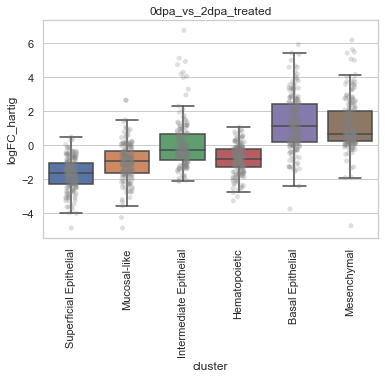

In [140]:
# box plot their distributions

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

ax = sns.boxplot(x="cluster", y="logFC_hartig", data=merged_gene_list, showfliers = False).set_title(file)
ax = sns.stripplot(x="cluster", y="logFC_hartig", data=merged_gene_list, color="0.5", alpha=0.25)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.savefig(plotname, bbox_inches='tight')
plt.show()

In [141]:
summary = pd.DataFrame(superficial_stats)
summary.columns = ["superficial"]
summary['intermediate'] = intermediate_stats
summary['basal'] = basal_stats
summary['mucosal-like'] = mucosal_stats
summary['mesenchymal'] = mesenchymal_stats
summary['hematopoietic'] = hema_stats

In [142]:
summary

,superficial,intermediate,basal,mucosal-like,mesenchymal,hematopoietic
count,181.000000,155.000000,188.000000,169.000000,183.000000,173.000000
mean,-1.691156,0.046724,1.272596,-0.997480,1.137951,-0.842570
std,0.935274,1.500788,1.599675,1.115490,1.489256,0.835295
min,-4.899526,-2.151148,-3.774328,-4.899526,-4.762562,-3.288884
25%,-2.283304,-0.860000,0.191919,-1.663383,0.254250,-1.324158
50%,-1.639091,-0.325669,1.100714,-0.954725,0.656372,-0.816715
75%,-1.093351,0.628373,2.382267,-0.353728,2.003801,-0.228864
max,0.476495,6.750942,5.917229,2.638820,6.179994,1.036925
MAD,0.896001,1.134047,1.519939,1.031915,0.836512,0.831164


In [143]:
import dataframe_image as dfi
df_styled = summary.style.background_gradient()
df_styled = summary.style.set_caption(file)
dfi.export(df_styled, tablename)